## This my personal Project using Logistic Regression Model to Predict if a passanger on the Titanic Ship survived or not

## Note:
#### keywords in the dataset
    1.Survived: 1 = Survived, 0 = Did not Survived
    2. Pclass: Social-economic Status, 1 = Upperclass, 2 = Middleclass, 3 = LowerClass
    3. sibsp = Number siblings/Spouses onboard
    4. parch = Number of Parents/Children onboard
    5. Embarked = Boarding Port, C = Cherbourg, Q = Queenstown, S = Southampton

### Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

### Importing dataset and exploring the data

In [2]:
df =  pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
# dropping columns that provide information that is not needed for building our model
drop = ["PassengerId", "Name", "Ticket", "Fare", "Cabin"]
df = df.drop(drop, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [8]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [9]:
# from the result above it can be seen that 177 passenger age is missing
# Filling the missing ages with mean age

mean = df["Age"].mean(skipna=True)
mean = round(mean)
df["Age"] = df["Age"].fillna(value=mean)

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [11]:
#To delete the two missing rows
df.dropna(inplace=True)

In [12]:
#No missing value
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [13]:
#Converting sex into binary, Male=1, Female=0 and droping sex column
df["Gender"] = (df["Sex"] == "male").astype(int)
df = df.drop(["Sex"], axis=1)

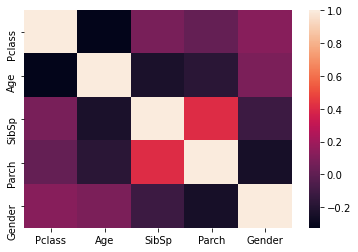

In [14]:
#Plot a heatmap using the correlation to check if there is any multicolinearity feature, the Survived feature will not be uses since it is our targeted feature
correlation = df.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(correlation);

In [32]:
# It can be seen that there are no multicolinearity features present in our data

In [15]:
round((df["Survived"].value_counts(normalize=True))*100)
#it can be seen that 62% did not survived and 38% survived

0    62.0
1    38.0
Name: Survived, dtype: float64

In [16]:
round((df["Gender"].value_counts(normalize=True))*100)
#It can be seen that 65% are male and 35% are female

1    65.0
0    35.0
Name: Gender, dtype: float64

In [17]:
round((df["Embarked"].value_counts(normalize=True))*100)
#It can be see that 72% board at Southampton, 19% at Cherbourg and 9% at Queenstown

S    72.0
C    19.0
Q     9.0
Name: Embarked, dtype: float64

### Spliting data and building Model

In [18]:
target = "Survived"
X = df.drop(columns=target)
y = df[target]

In [19]:
#30% of the data will be used as test data set and 70% as the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.8314606741573034

In [56]:
confusion_matrix(y_test, y_pred)

array([[144,  22],
       [ 23,  78]], dtype=int64)

### Building a Predicting function, to predict if a passanger survived or not

In [78]:
#Sclass = ""
#Emb = ""
#Gen = ""

def make_prediction(Pclass, Age, SibSp, Parch, Port, Sex):
    if Pclass == "Upper":
        Pclass= 1
    elif Pclass == "Middle":
        Pclass = 2
    else:
        Pclass = 3
    
    if Port == "Cherbourg":
        Port= "C"
    elif Port == "Southampton":
        Port = "S"
    else:
        Port = "Q"
        
    if Sex == "Male":
        Sex = 1
    else:
        Sex = 0
    
    data = {
        "Pclass": Pclass,
        "Age" : Age,
        "SibSp" : SibSp,
        "Parch": Parch,
        "Embarked": Port,
        "Gender": Sex
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict_proba(df)[0][0]
    if prediction < 0.5:
        case = "Survived"
    else:
        case = "Did not Survived"
    return f"Passanger {case}"

### The first three row in the dataset

In [83]:
make_prediction("Lower", 22, 1, 0 , "Southampton", "Male")

'Passanger Did not Survived'

In [84]:
make_prediction("Upper", 38, 1, 0, "Cherbourg", "Female")

'Passanger Survived'

In [85]:
make_prediction("Lower", 26, 0, 0, "Southampton", "Female")

'Passanger Survived'

In [60]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,0
2,1,3,26.0,0,0,S,0
3,1,1,35.0,1,0,S,0
4,0,3,35.0,0,0,S,1
